## Anomaly Detection


**Part A:**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [12, 4, 8, 10, 6, 2, 50]

Using a box plot, show the outliers in the box plot.

In [25]:
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
from sklearn.neighbors import LocalOutlierFactor

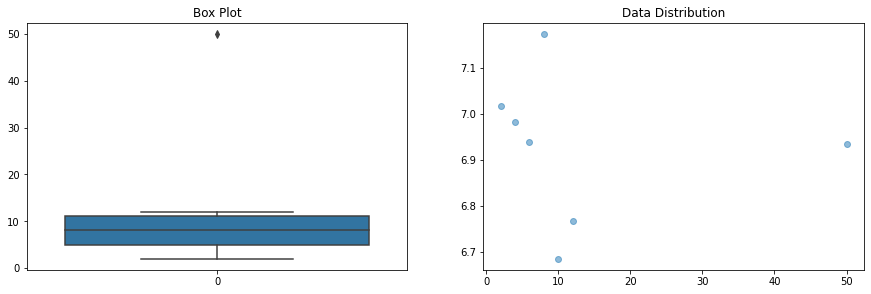

In [26]:
data = pd.DataFrame([12, 4, 8, 10, 6, 2, 50])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sb.boxplot(data=data)
plt.title("Box Plot")

plt.subplot(2, 2, 2);
plt.scatter(data, np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5);
plt.title("Data Distribution");

We can see from the boxplot and scatter plots that '50' is an outlier for the given input.

**Part B:**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

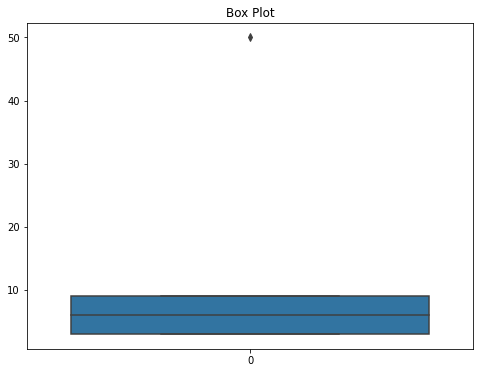

In [27]:
def z_score(df):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    return z_score

df = pd.DataFrame([6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3])
z_scored_data = z_score(df)

plt.figure(figsize=(8, 6))
sb.boxplot(data=df);
plt.title("Box Plot");

We can see from the boxplot and scatter plots that '50' is an outlier for the given input.

**Part C:**

Use the dataset attached for identifying the outliers using Z-score. 

Steps to follow in this question

- Step1: Show outliers using histograms and scatterplots. 

- Step2: Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3: Print the number of outliers removed.

- Step4: Use LocalOutlierFactor to plot the outliers from SalePrice and LotArea columns.

Step 1

In [28]:
data = pd.read_csv('outlier_assignment.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


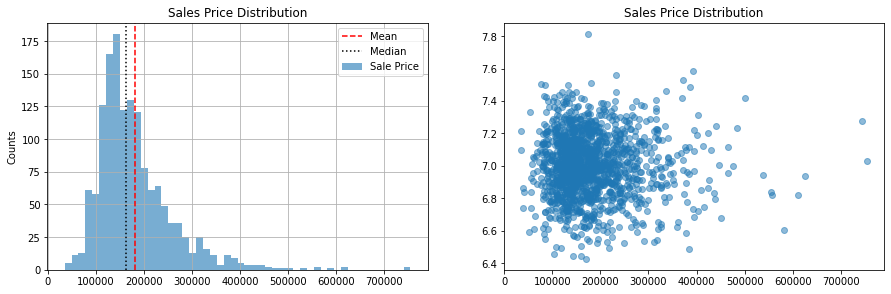

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data['SalePrice'].hist(bins=50, label='Sale Price', alpha=0.6)
plt.axvline(np.mean(data['SalePrice']), ls='--', color='red', label="Mean");
plt.axvline(np.median(data['SalePrice']), ls=':', color='black', label="Median");
plt.ylabel("Counts")
plt.title("Sales Price Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['SalePrice'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5);
plt.title("Sales Price Distribution");

The histogram and scatter plots show that the majority of the data is in the range of 50000 to 300000. As a result, values outside of that range are considered outliers. However, to distinguish this from good data, we can use the z-score.

Step 2

In [30]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"Z-score for threshold of {threshold} removes {(~good).sum()} outliers.")
    return good

Step 3

Z-score for threshold of 2 removes 63 outliers.
Z-score for threshold of 3 removes 22 outliers.
Z-score for threshold of 4 removes 9 outliers.
Z-score for threshold of 5 removes 5 outliers.


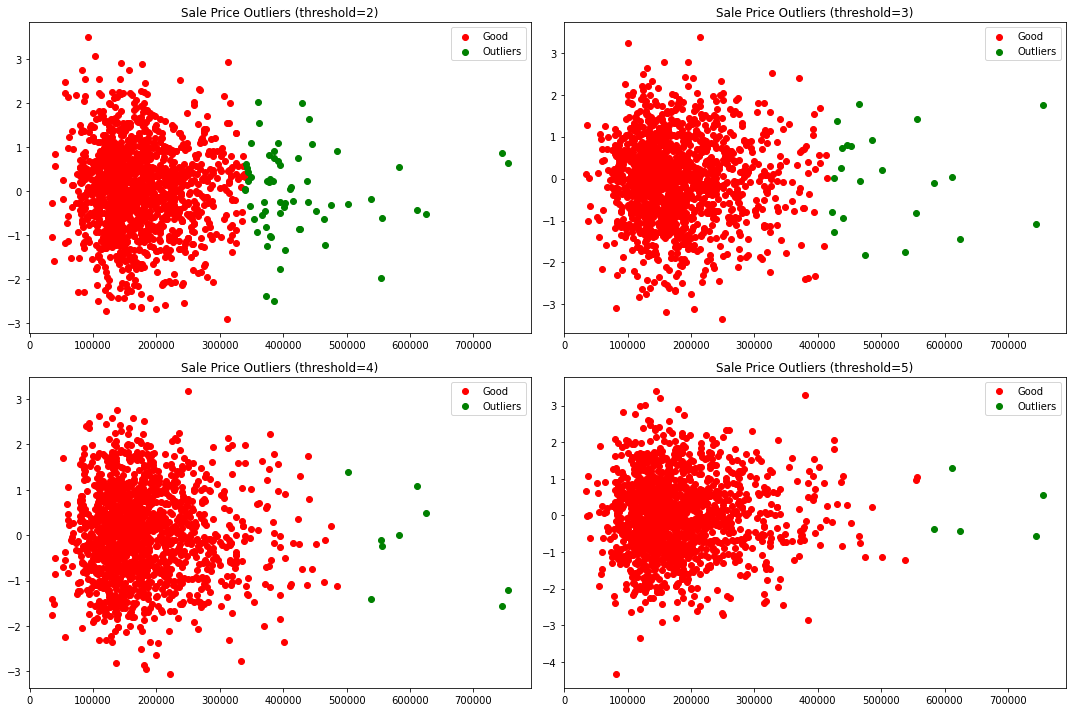

In [31]:
plt.figure(figsize=(15, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['SalePrice'], threshold=threshold)
    plt.scatter(data['SalePrice'][good], visual_scatter[good], label="Good", color="red")
    plt.scatter(data['SalePrice'][~good], visual_scatter[~good], label="Outliers", color="green")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

Step 4

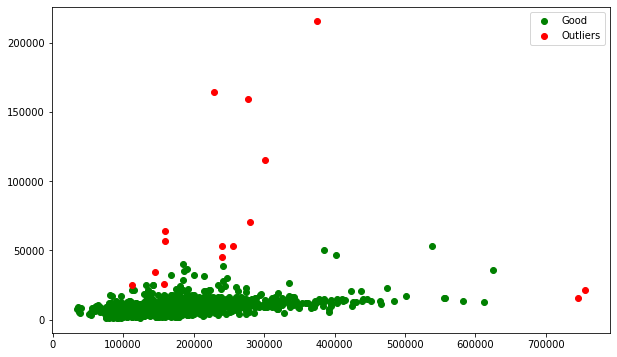

In [32]:
df = data[['SalePrice', 'LotArea']].to_numpy()

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
good = lof.fit_predict(df) == 1

plt.figure(figsize=(10, 6))
plt.scatter(df[good, 0], df[good, 1], label='Good', color="green");
plt.scatter(df[~good, 0], df[~good, 1], label='Outliers', color="red");
plt.legend();